In [37]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path

# Set up plotting style for scientific poster
plt.style.use('default')  # Using default style for cleaner scientific look
plt.rcParams['figure.figsize'] = (16, 12)  # Large figure for poster
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Define color palette for each agent
colors = {
    'data_analyst': '#2E8B57',      # Sea Green
    'coder': '#FF6B6B',             # Coral Red  
    'researcher': '#4ECDC4',        # Teal
    'biomedical_researcher': '#9B59B6'  # Purple
}

print("Loaded libraries and set up plotting configuration for scientific poster")

# 🎛️ VISUALIZATION CONTROL PARAMETERS
SHOW_WEIGHTS = False  # Set to False to hide metric weights, True to show both performance and weights

print(f"📊 Weights visualization: {'ENABLED' if SHOW_WEIGHTS else 'DISABLED'}")


Loaded libraries and set up plotting configuration for scientific poster
📊 Weights visualization: DISABLED


In [38]:
# Load evaluation data for all agents

# Data Analyst Agent
data_analyst_file = Path("../outputs/data_analyst/data_analyst_evaluation_summary_20250626_134834.json")
with open(data_analyst_file, 'r') as f:
    data_analyst_data = json.load(f)

# Coder Agent  
coder_file = Path("../outputs/coder/homogeneous/coder_evaluation_summary_20250625_115850.json")
with open(coder_file, 'r') as f:
    coder_data = json.load(f)

# Researcher Agent
researcher_file = Path("../outputs/researcher/evaluation_summary_20250624_150505.json")
with open(researcher_file, 'r') as f:
    researcher_data = json.load(f)

# Biomedical Researcher Agent (using latest expanded evaluation)
biomedical_file = Path("../outputs/biomedical_researcher/full_expanded/biomedical_researcher_evaluation_20250626_154925.json")
with open(biomedical_file, 'r') as f:
    biomedical_full_data = json.load(f)
    biomedical_data = biomedical_full_data['evaluation_summary']  # Extract the summary section

print("Loaded evaluation data for all agents:")
print(f"• Data Analyst: {data_analyst_data['total_cases']} cases, {data_analyst_data['success_rate']:.1%} success")
print(f"• Coder: {coder_data['total_cases']} cases, {coder_data['success_rate']:.1%} success")
print(f"• Researcher: {researcher_data['total_cases']} cases, {researcher_data['overall_success_rate']:.1%} success")
print(f"• Biomedical Researcher: {biomedical_data['total_cases']} cases, {biomedical_data['success_rate']:.1%} success")


Loaded evaluation data for all agents:
• Data Analyst: 30 cases, 100.0% success
• Coder: 19 cases, 94.7% success
• Researcher: 22 cases, 100.0% success
• Biomedical Researcher: 30 cases, 80.0% success


In [58]:
def create_radar_chart_with_weights(ax, categories, values, weights, title, color, max_val=1.0, show_weights=True):
    """
    Create a radar chart with both performance values and metric weights.
    
    Args:
        ax: matplotlib axis (polar projection)
        categories: list of category names
        values: list of performance values corresponding to categories
        weights: list of weight values corresponding to categories
        title: chart title
        color: color for the performance plot
        max_val: maximum value for the radial axis
        show_weights: boolean, whether to display metric weights (default: True)
    """
    # Number of variables
    N = len(categories)
    
    # Compute angle for each axis
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Complete the circle
    
    # Close the plots by adding the first value at the end
    values_closed = values + values[:1]
    weights_closed = weights + weights[:1]
    
    # Draw the performance plot (solid line)
    perf_label = f'{title} - Performance' if show_weights else title
    ax.plot(angles, values_closed, 'o-', linewidth=3, label=perf_label, 
            color=color, markersize=6, alpha=0.8)
    ax.fill(angles, values_closed, alpha=0.25, color=color)
    
    # Conditionally draw the weights plot (dashed line)
    if show_weights:
        weight_color = plt.cm.colors.to_rgba(color, alpha=0.6)  # Lighter version of same color
        ax.plot(angles, weights_closed, 's--', linewidth=2, label=f'{title} - Weights', 
                color=weight_color, markersize=4, alpha=0.7)
    
    # Add category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=18)
    
    # Set y-axis limits
    ax.set_ylim(0, max_val)
    
    # Add agent name in the center of the polar chart instead of title
    ax.text(0, 0, title, horizontalalignment='center', verticalalignment='center', 
            fontsize=18, fontweight='bold', 
            bbox=dict(boxstyle="round,pad=0.4", facecolor='white', alpha=0.9, edgecolor='gray', linewidth=1))
    
    # Add grid
    ax.grid(True, alpha=0.3, linewidth=1)
    
    # Add value labels on the plot
    # for angle, value, weight, category in zip(angles[:-1], values, weights, categories):
    #     # Position the performance label slightly outside the point
    #     perf_radius = min(value + 0.08, max_val - 0.02)
    #     ax.text(angle, perf_radius, f'{value:.2f}', 
    #             horizontalalignment='center', verticalalignment='center', 
    #             fontweight='bold', fontsize=12, 
    #             bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.9, edgecolor='none'))
        
    #     # Conditionally add weight labels closer to the center
    #     if show_weights:
    #         weight_radius = max(weight - 0.05, 0.1)
    #         ax.text(angle, weight_radius, f'w:{weight:.2f}', 
    #                 horizontalalignment='center', verticalalignment='center', 
    #                 fontweight='normal', fontsize=10, style='italic',
    #                 bbox=dict(boxstyle="round,pad=0.15", facecolor='lightgray', alpha=0.7, edgecolor='none'))
    
    # Configure radial ticks
    ax.set_rticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_rmax(max_val)
    ax.tick_params(axis='y', labelsize=14)  # Increase radial tick label size
    
    # Conditionally add legend (only if weights are shown, otherwise legend is unnecessary)
    if show_weights:
        ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), fontsize=8)
    
    return ax

print("Enhanced radar chart function with weights defined")


Enhanced radar chart function with weights defined


In [49]:
# Prepare data for each agent's radar chart

# Data Analyst - using 'by_metric' data
data_analyst_categories = [metric.replace('_', ' ').title() for metric in data_analyst_data['by_metric'].keys()]
data_analyst_values = list(data_analyst_data['by_metric'].values())

# Data Analyst weights (using standard weights for data queries)
data_analyst_weights_dict = {
    "sql_correctness": 0.30,
    "schema_understanding": 0.25,
    "query_execution": 0.25,
    "data_presentation": 0.10,
    "workflow_completeness": 0.10,
}
data_analyst_weights = [data_analyst_weights_dict[metric] for metric in data_analyst_data['by_metric'].keys()]

# Coder - using 'by_metric' data (excluding code_execution)
coder_metrics = {k: v for k, v in coder_data['by_metric'].items() if k != 'code_execution'}
coder_categories = [metric.replace('_', ' ').title() for metric in coder_metrics.keys()]
coder_values = list(coder_metrics.values())

# Coder weights (excluding code_execution and normalizing)
coder_weights_dict = {
    "task_completion": 0.30,
    "code_correctness": 0.25,
    "data_analysis": 0.15,
    "visualization": 0.05,
    "code_style": 0.05
}
# Normalize weights to sum to 1 after excluding code_execution
total_weight = sum(coder_weights_dict.values())
coder_weights_dict = {k: v/total_weight for k, v in coder_weights_dict.items()}
coder_weights = [coder_weights_dict[metric] for metric in coder_metrics.keys()]

# Researcher - using 'metric_averages' data
researcher_categories = [metric.replace('_', ' ').title() for metric in researcher_data['metric_averages'].keys()]
researcher_values = list(researcher_data['metric_averages'].values())

# Researcher weights (matching available metrics)
researcher_weights_dict = {
    "search_quality": 0.10,
    "information_synthesis": 0.12,
    "source_quality": 0.10,
    "research_completeness": 0.12,
    "temporal_accuracy": 0.08,
    "bias_assessment": 0.05,
    "factual_verification": 0.05
}
# Normalize weights to sum to 1 for displayed metrics
total_weight = sum(researcher_weights_dict.values())
researcher_weights_dict = {k: v/total_weight for k, v in researcher_weights_dict.items()}
researcher_weights = [researcher_weights_dict[metric] for metric in researcher_data['metric_averages'].keys()]

# Biomedical Researcher - using 'metric_averages' data
biomedical_categories = [metric.replace('_', ' ').title() for metric in biomedical_data['metric_averages'].keys()]
biomedical_values = list(biomedical_data['metric_averages'].values())

# Biomedical Researcher weights (matching available metrics - now includes temporal_accuracy)
biomedical_weights_dict = {
    'factual_correctness': 0.35,
    'relevance': 0.25,
    'source_quality': 0.15,
    'temporal_accuracy': 0.15,  # Now available in the new evaluation data
    'confidence_alignment': 0.10
}
# All metrics are now available in the data, so use original weights
biomedical_weights = [biomedical_weights_dict[metric] for metric in biomedical_data['metric_averages'].keys()]

print("Prepared data and weights for all agents:")
print(f"• Data Analyst: {len(data_analyst_categories)} metrics, avg score = {np.mean(data_analyst_values):.3f}, avg weight = {np.mean(data_analyst_weights):.3f}")
print(f"• Coder: {len(coder_categories)} metrics, avg score = {np.mean(coder_values):.3f}, avg weight = {np.mean(coder_weights):.3f} (excluded Code Execution)")
print(f"• Researcher: {len(researcher_categories)} metrics, avg score = {np.mean(researcher_values):.3f}, avg weight = {np.mean(researcher_weights):.3f}")
print(f"• Biomedical Researcher: {len(biomedical_categories)} metrics, avg score = {np.mean(biomedical_values):.3f}, avg weight = {np.mean(biomedical_weights):.3f}")


Prepared data and weights for all agents:
• Data Analyst: 5 metrics, avg score = 0.876, avg weight = 0.200
• Coder: 5 metrics, avg score = 0.811, avg weight = 0.200 (excluded Code Execution)
• Researcher: 7 metrics, avg score = 0.961, avg weight = 0.143
• Biomedical Researcher: 5 metrics, avg score = 0.890, avg weight = 0.200


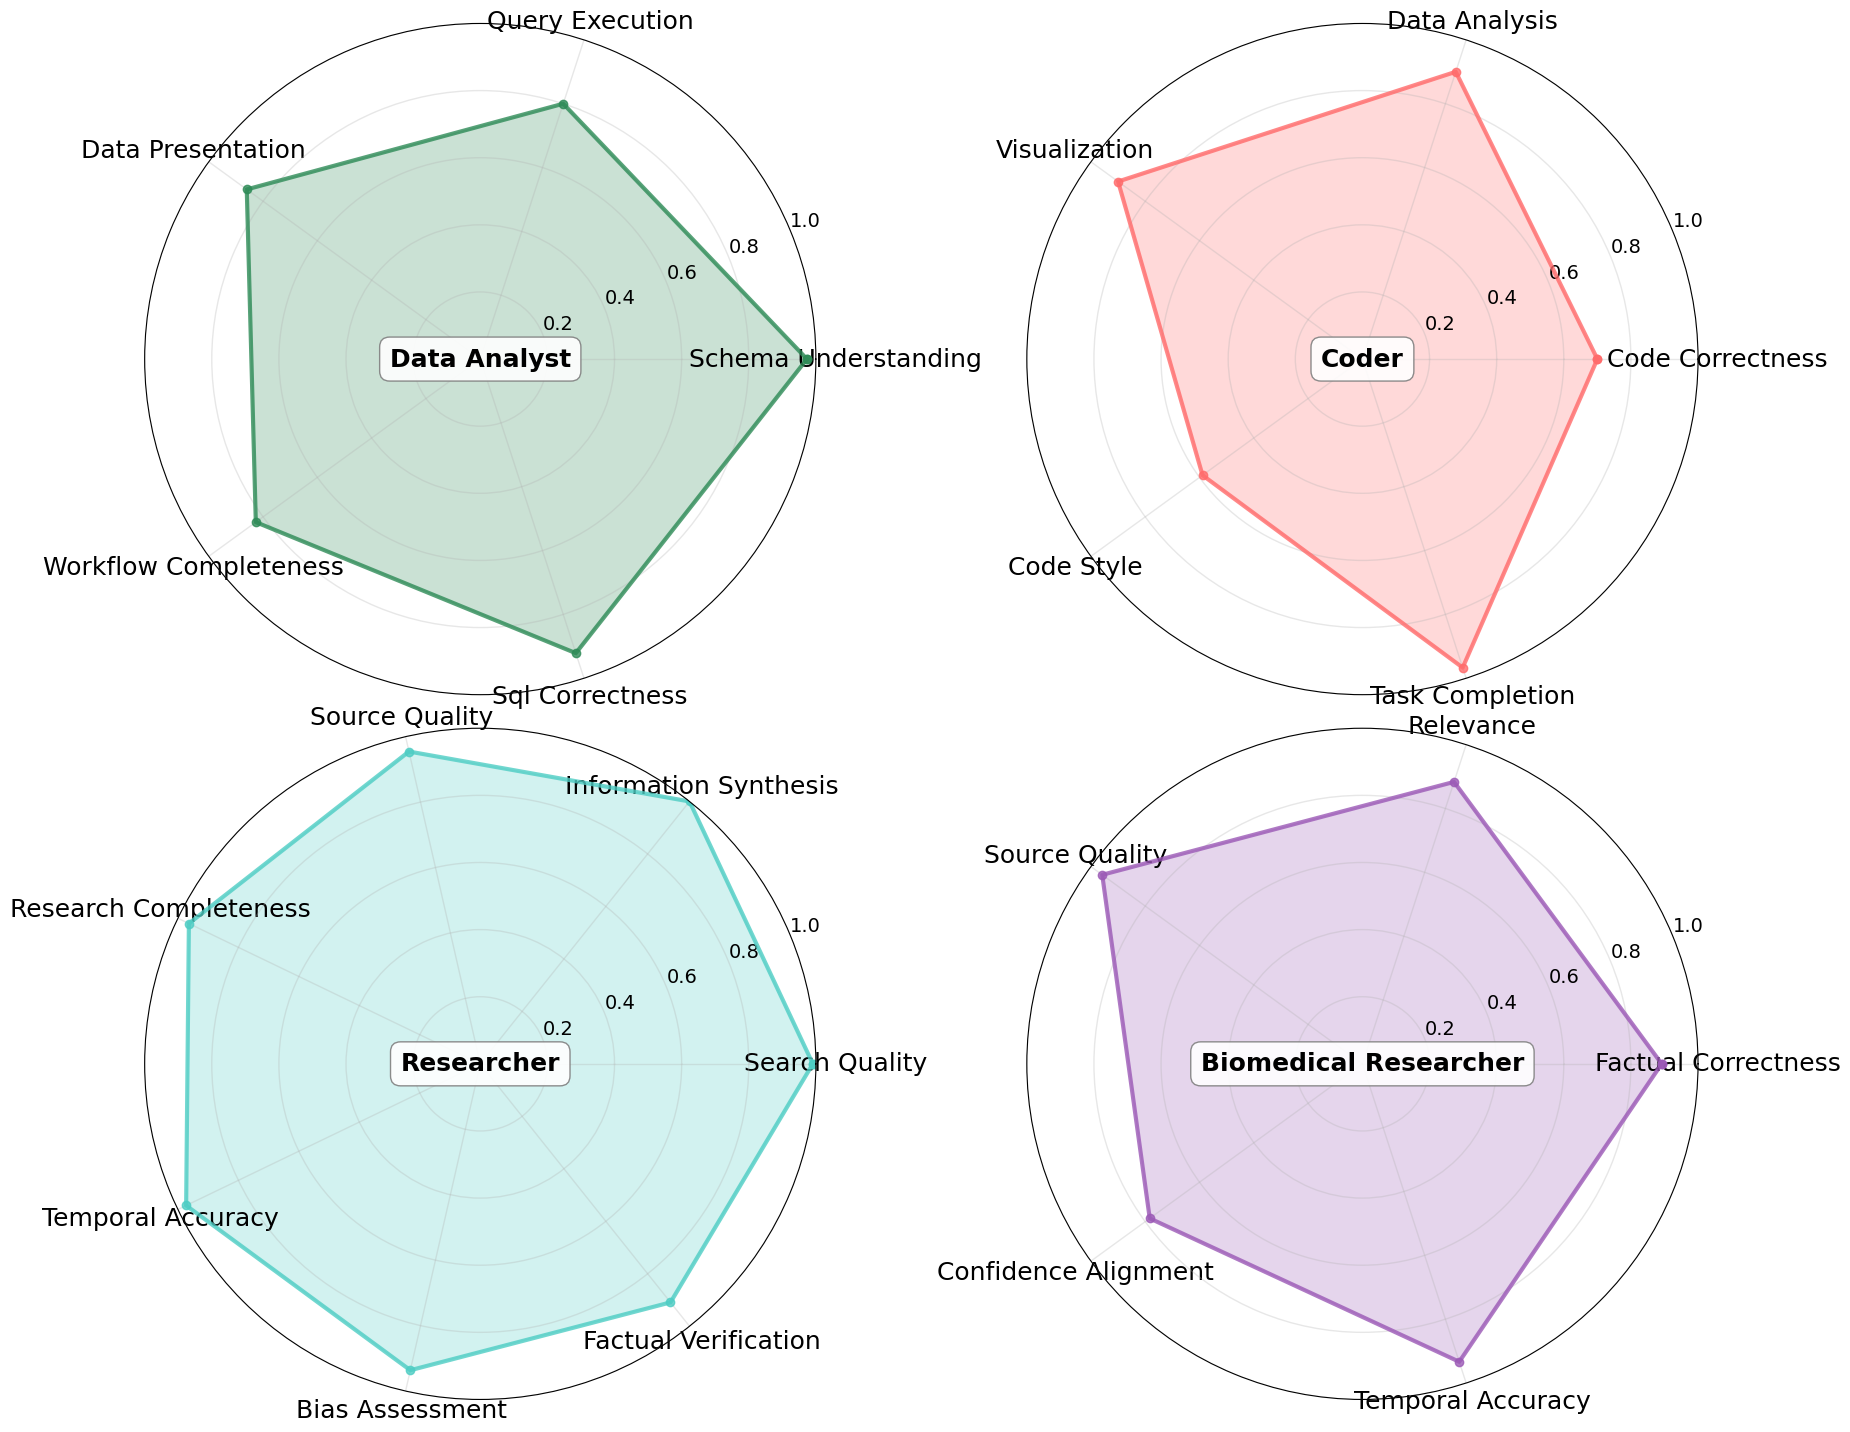

\n✅ Poster figure created successfully!
📁 Saved as:
   • agent_performance_poster_figure.png (high resolution)
   • agent_performance_poster_figure.pdf (vector format)
📊 Figure shows 2x2 grid with radar charts for all four agents
🎯 Each chart displays performance scores only
💡 To show metric weights, set SHOW_WEIGHTS = True in the first cell


In [61]:
# Create the main 2x2 grid figure for scientific poster
fig = plt.figure(figsize=(20, 16))

# Create 2x2 subplot grid with polar projections
ax1 = plt.subplot(2, 2, 1, projection='polar')  # [0,0] - Data Analyst
ax2 = plt.subplot(2, 2, 2, projection='polar')  # [0,1] - Coder  
ax3 = plt.subplot(2, 2, 3, projection='polar')  # [1,0] - Researcher
ax4 = plt.subplot(2, 2, 4, projection='polar')  # [1,1] - Biomedical Researcher

# [0,0] - Data Analyst Agent
create_radar_chart_with_weights(
    ax1, 
    data_analyst_categories, 
    data_analyst_values.copy(),  # Copy to avoid modifying original data
    data_analyst_weights.copy(),
    'Data Analyst', 
    colors['data_analyst'],
    show_weights=SHOW_WEIGHTS
)

# [0,1] - Coder Agent
create_radar_chart_with_weights(
    ax2, 
    coder_categories, 
    coder_values.copy(),  # Copy to avoid modifying original data
    coder_weights.copy(),
    'Coder', 
    colors['coder'],
    show_weights=SHOW_WEIGHTS
)

# [1,0] - Researcher Agent
create_radar_chart_with_weights(
    ax3, 
    researcher_categories, 
    researcher_values.copy(),  # Copy to avoid modifying original data
    researcher_weights.copy(),
    'Researcher', 
    colors['researcher'],
    show_weights=SHOW_WEIGHTS
)

# [1,1] - Biomedical Researcher Agent
create_radar_chart_with_weights(
    ax4, 
    biomedical_categories, 
    biomedical_values.copy(),  # Copy to avoid modifying original data
    biomedical_weights.copy(),
    'Biomedical Researcher', 
    colors['biomedical_researcher'],
    show_weights=SHOW_WEIGHTS
)

# Minimize spacing between subplots to remove middle space, no space needed for titles
plt.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.12, wspace=-0.15, hspace=0.05)

# Save the figure for poster use
plt.savefig('../outputs/agent_performance_poster_figure.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('../outputs/agent_performance_poster_figure.pdf', bbox_inches='tight', 
            facecolor='white', edgecolor='none')

plt.show()

print("\\n✅ Poster figure created successfully!")
print("📁 Saved as:")
print("   • agent_performance_poster_figure.png (high resolution)")  
print("   • agent_performance_poster_figure.pdf (vector format)")
print("📊 Figure shows 2x2 grid with radar charts for all four agents")

if SHOW_WEIGHTS:
    print("🎯 Each chart displays both performance scores (solid lines) and metric weights (dashed lines)")
    print("💡 Performance values show actual evaluation results, weights show importance in scoring")
else:
    print("🎯 Each chart displays performance scores only")
    print("💡 To show metric weights, set SHOW_WEIGHTS = True in the first cell")


In [51]:
# Additional analysis: Performance comparison across agents

# Create a summary table
performance_summary = pd.DataFrame({
    'Agent': ['Data Analyst', 'Coder', 'Researcher', 'Biomedical Researcher'],
    'Total Cases': [data_analyst_data['total_cases'], coder_data['total_cases'], 
                   researcher_data['total_cases'], biomedical_data['total_cases']],
    'Success Rate': [data_analyst_data['success_rate'], coder_data['success_rate'],
                    researcher_data['overall_success_rate'], biomedical_data['success_rate']],
    'Average Score': [data_analyst_data['average_score'], coder_data['average_score'],
                     researcher_data['average_score'], biomedical_data['average_score']],
    'Number of Metrics': [len(data_analyst_categories), len(coder_categories),
                         len(researcher_categories), len(biomedical_categories)]
})

print("📊 Performance Summary Table:")
print("=" * 80)
print(performance_summary.to_string(index=False, float_format='%.3f'))

# Identify top performing metrics for each agent
print("\\n🏆 Top Performing Metrics by Agent:")
print("=" * 50)

# Data Analyst top metrics
da_top = sorted(zip(data_analyst_categories, data_analyst_values), key=lambda x: x[1], reverse=True)[:3]
print(f"\\n🔹 Data Analyst:")
for metric, score in da_top:
    print(f"   • {metric}: {score:.3f}")

# Coder top metrics  
coder_top = sorted(zip(coder_categories, coder_values), key=lambda x: x[1], reverse=True)[:3]
print(f"\\n🔹 Coder:")
for metric, score in coder_top:
    print(f"   • {metric}: {score:.3f}")

# Researcher top metrics
researcher_top = sorted(zip(researcher_categories, researcher_values), key=lambda x: x[1], reverse=True)[:3]
print(f"\\n🔹 Researcher:")
for metric, score in researcher_top:
    print(f"   • {metric}: {score:.3f}")

# Biomedical Researcher top metrics
bio_top = sorted(zip(biomedical_categories, biomedical_values), key=lambda x: x[1], reverse=True)[:3]
print(f"\\n🔹 Biomedical Researcher:")
for metric, score in bio_top:
    print(f"   • {metric}: {score:.3f}")

print("\\n" + "=" * 80)
print("✅ Analysis complete! The poster figure is ready for your scientific conference.")
print("🎯 Key findings:")
print(f"   • Highest overall score: {performance_summary.loc[performance_summary['Average Score'].idxmax(), 'Agent']} ({performance_summary['Average Score'].max():.3f})")
print(f"   • Most test cases: {performance_summary.loc[performance_summary['Total Cases'].idxmax(), 'Agent']} ({performance_summary['Total Cases'].max()} cases)")
print(f"   • Perfect success rate: {len(performance_summary[performance_summary['Success Rate'] == 1.0])} agents achieved 100% success")


📊 Performance Summary Table:
                Agent  Total Cases  Success Rate  Average Score  Number of Metrics
         Data Analyst           30         1.000          0.889                  5
                Coder           19         0.947          0.832                  5
           Researcher           22         1.000          0.968                  7
Biomedical Researcher           30         0.800          0.895                  5
\n🏆 Top Performing Metrics by Agent:
\n🔹 Data Analyst:
   • Schema Understanding: 0.973
   • Sql Correctness: 0.921
   • Data Presentation: 0.860
\n🔹 Coder:
   • Task Completion: 0.967
   • Data Analysis: 0.900
   • Visualization: 0.900
\n🔹 Researcher:
   • Information Synthesis: 1.000
   • Search Quality: 0.991
   • Temporal Accuracy: 0.973
\n🔹 Biomedical Researcher:
   • Source Quality: 0.958
   • Temporal Accuracy: 0.933
   • Factual Correctness: 0.892
\n================================================================================
✅ Analysis co